In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

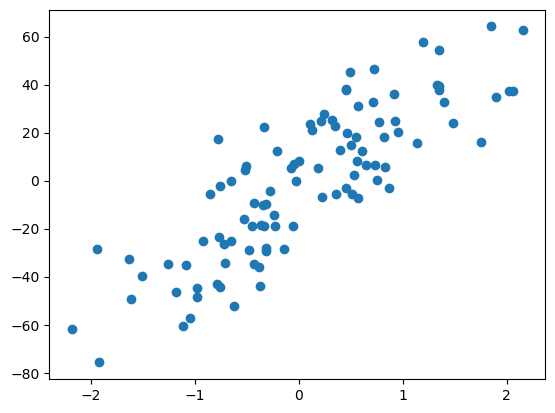

In [4]:
plt.scatter(x,y)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [15]:
lin.intercept_,lin.coef_

(-2.3374676965783356, array([30.06810421]))

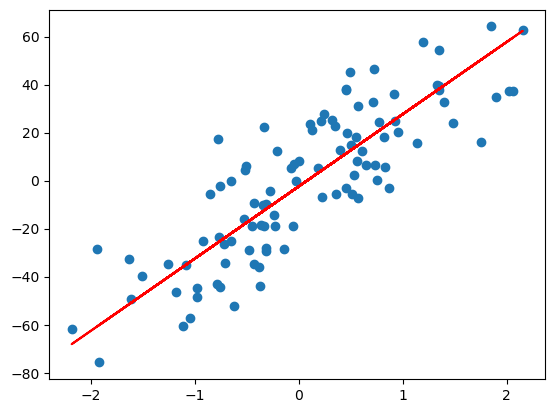

In [16]:
plt.scatter(x,y)
plt.plot(x,lin.predict(x),color='red')

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+04, tolerance: 8.470e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

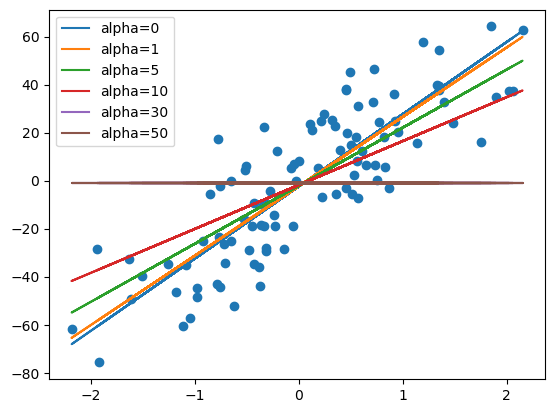

In [20]:
from sklearn.linear_model import Lasso
plt.scatter(x,y)
alphas = [0,1,5,10,30,50]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train,y_train)
    plt.plot(x,lasso.predict(x),label='alpha={}'.format(alpha))
plt.legend()
# in lasso there is chance for coefs become zero unlike in ridge

### reducing overfitting in lasso 

In [124]:
x = 6*np.random.random((100,1))-3
y = 0.7*x**2 - 2*x + 3 + 7*np.random.random((100,1))

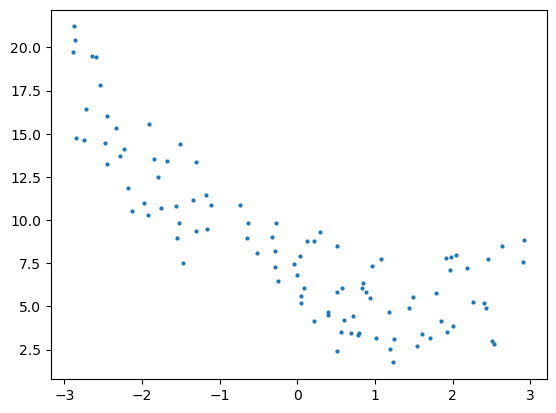

In [125]:
plt.scatter(x,y,s=4)

In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
def get_preds_lasso(a,x_test):
    pipe = Pipeline((
        ['polynomial_features',PolynomialFeatures(degree=20)],
        ['lasso',Lasso(alpha=a)]
    ))

    pipe.fit(x,y)
    return pipe.predict(x_test)

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.592e+02, tolerance: 2.097e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

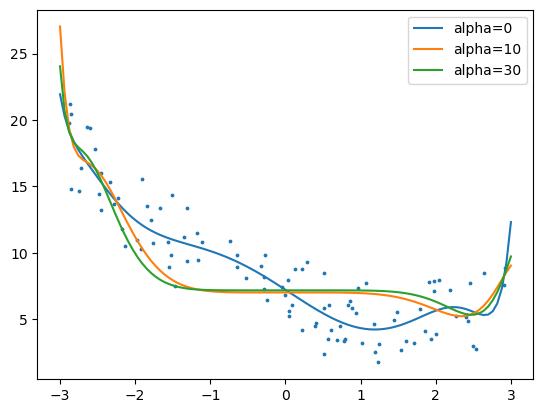

In [130]:
plt.scatter(x,y,s=3)
x_new = np.linspace(-3,3,100).reshape(100,1)
plt.plot(x_new,get_preds_lasso(0,x_new),label='alpha=0')
plt.plot(x_new,get_preds_lasso(5,x_new),label='alpha=10')
plt.plot(x_new,get_preds_lasso(30,x_new),label='alpha=30')
plt.legend()

In [49]:
x.shape

(100, 1)